## D212 - Data Mining II - PA1

### Background Info:

**You are an analyst on a team of analysts for a popular medical hospital chain with patients in almost every state in the United States. You have been asked to investigate the extent to which readmission is a problem for this chain of hospitals.The purpose of the analysis is to predict readmission based on other conditions and factors of the patient.**

**You have been asked to use PCA to analyze patient data to identify the principal variables of your patients, ultimately allowing better business and strategic decision-making for the hospital.**

**_Question: "From information about previous patients who were readmitted, can we predict which patients are likely to be readmitted in the future?"_**

### Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy import stats
%matplotlib inline

### Load Data From medical_clean.csv

In [3]:
# load data file
df = pd.read_csv('medical_clean.csv')
# quick test the data is present and see the shape
df.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,...,3726.702860,17939.403420,3,3,2,2,4,3,3,4
1,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,...,4193.190458,17612.998120,3,4,3,4,4,4,3,3
2,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,...,2434.234222,17505.192460,2,4,4,4,3,4,3,3
3,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,...,2127.830423,12993.437350,3,5,5,3,4,5,5,5
4,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,...,2113.073274,3716.525786,2,1,3,3,5,3,4,3


---
### Exploratory Data Analysis
---

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           10000 non-null  int64  
 1   Customer_id         10000 non-null  object 
 2   Interaction         10000 non-null  object 
 3   UID                 10000 non-null  object 
 4   City                10000 non-null  object 
 5   State               10000 non-null  object 
 6   County              10000 non-null  object 
 7   Zip                 10000 non-null  int64  
 8   Lat                 10000 non-null  float64
 9   Lng                 10000 non-null  float64
 10  Population          10000 non-null  int64  
 11  Area                10000 non-null  object 
 12  TimeZone            10000 non-null  object 
 13  Job                 10000 non-null  object 
 14  Children            10000 non-null  int64  
 15  Age                 10000 non-null  int64  
 16  Incom

### Check for Missing Values

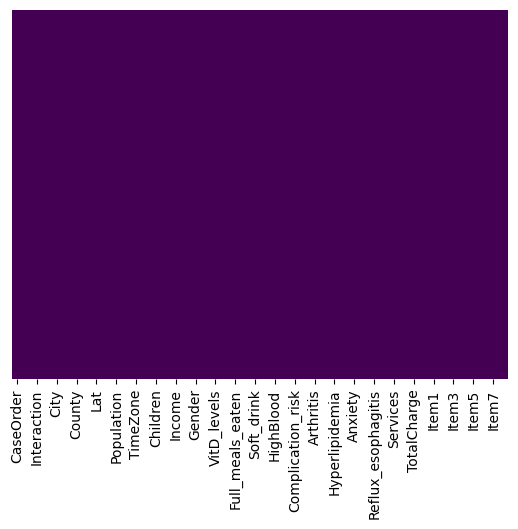

In [5]:
# Mapping to view missing data...none present.
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis');

In [6]:
df.describe()

,CaseOrder,Zip,Lat,Lng,Population,Children,Age,Income,VitD_levels,Doc_visits,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,50159.323900,38.751099,-91.243080,9965.253800,2.097200,53.511700,40490.495160,17.964262,5.012200,...,5312.172769,12934.528587,3.518800,3.506700,3.511100,3.515100,3.496900,3.522500,3.494000,3.509700
std,2886.89568,27469.588208,5.403085,15.205998,14824.758614,2.163659,20.638538,28521.153293,2.017231,1.045734,...,2180.393838,6542.601544,1.031966,1.034825,1.032755,1.036282,1.030192,1.032376,1.021405,1.042312
min,1.00000,610.000000,17.967190,-174.209700,0.000000,0.000000,18.000000,154.080000,9.806483,1.000000,...,1938.312067,3125.703000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2500.75000,27592.000000,35.255120,-97.352982,694.750000,0.000000,36.000000,19598.775000,16.626439,4.000000,...,3179.374015,7986.487755,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,5000.50000,50207.000000,39.419355,-88.397230,2769.000000,1.000000,53.000000,33768.420000,17.951122,5.000000,...,5213.952000,11573.977735,4.000000,3.000000,4.000000,4.000000,3.000000,4.000000,3.000000,3.000000
75%,7500.25000,72411.750000,42.044175,-80.438050,13945.000000,3.000000,71.000000,54296.402500,19.347963,6.000000,...,7459.699750,15626.490000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,10000.00000,99929.000000,70.560990,-65.290170,122814.000000,10.000000,89.000000,207249.100000,26.394449,9.000000,...,9180.728000,30566.070000,8.000000,7.000000,8.000000,7.000000,7.000000,7.000000,7.000000,7.000000


### Describe and Explore Numeric Fields:

In [7]:
df.describe(include = [np.number])

,CaseOrder,Zip,Lat,Lng,Population,Children,Age,Income,VitD_levels,Doc_visits,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,50159.323900,38.751099,-91.243080,9965.253800,2.097200,53.511700,40490.495160,17.964262,5.012200,...,5312.172769,12934.528587,3.518800,3.506700,3.511100,3.515100,3.496900,3.522500,3.494000,3.509700
std,2886.89568,27469.588208,5.403085,15.205998,14824.758614,2.163659,20.638538,28521.153293,2.017231,1.045734,...,2180.393838,6542.601544,1.031966,1.034825,1.032755,1.036282,1.030192,1.032376,1.021405,1.042312
min,1.00000,610.000000,17.967190,-174.209700,0.000000,0.000000,18.000000,154.080000,9.806483,1.000000,...,1938.312067,3125.703000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2500.75000,27592.000000,35.255120,-97.352982,694.750000,0.000000,36.000000,19598.775000,16.626439,4.000000,...,3179.374015,7986.487755,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,5000.50000,50207.000000,39.419355,-88.397230,2769.000000,1.000000,53.000000,33768.420000,17.951122,5.000000,...,5213.952000,11573.977735,4.000000,3.000000,4.000000,4.000000,3.000000,4.000000,3.000000,3.000000
75%,7500.25000,72411.750000,42.044175,-80.438050,13945.000000,3.000000,71.000000,54296.402500,19.347963,6.000000,...,7459.699750,15626.490000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,10000.00000,99929.000000,70.560990,-65.290170,122814.000000,10.000000,89.000000,207249.100000,26.394449,9.000000,...,9180.728000,30566.070000,8.000000,7.000000,8.000000,7.000000,7.000000,7.000000,7.000000,7.000000


#### Create DataFrame w/Number DataTypes Only

In [8]:
df_num = df.select_dtypes(include='number')
df_num.head()

,CaseOrder,Zip,Lat,Lng,Population,Children,Age,Income,VitD_levels,Doc_visits,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,35621,34.34960,-86.72508,2951,1,53,86575.93,19.141466,6,...,3726.702860,17939.403420,3,3,2,2,4,3,3,4
1,2,32446,30.84513,-85.22907,11303,3,51,46805.99,18.940352,4,...,4193.190458,17612.998120,3,4,3,4,4,4,3,3
2,3,57110,43.54321,-96.63772,17125,3,53,14370.14,18.057507,4,...,2434.234222,17505.192460,2,4,4,4,3,4,3,3
3,4,56072,43.89744,-93.51479,2162,0,78,39741.49,16.576858,4,...,2127.830423,12993.437350,3,5,5,3,4,5,5,5
4,5,23181,37.59894,-76.88958,5287,1,22,1209.56,17.439069,5,...,2113.073274,3716.525786,2,1,3,3,5,3,4,3


### Describe and Explore Categorical Fields:

In [9]:
df.describe(exclude=[np.number])

,Customer_id,Interaction,UID,City,State,County,Area,TimeZone,Job,Marital,...,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services
count,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,...,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000
unique,10000,10000,10000,6072,52,1607,3,26,639,5,...,2,2,2,2,2,2,2,2,2,4
top,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Houston,TX,Jefferson,Rural,America/New_York,Outdoor activities/education manager,Widowed,...,Yes,No,No,No,No,No,No,No,No,Blood Work
freq,1,1,1,36,553,118,3369,3889,29,2045,...,7094,6426,7262,6628,5886,6785,6059,5865,7107,5265


#### Create DataFrame w/Categorical DataTypes Only

In [10]:
df_cat = df.select_dtypes(exclude='number')
df_cat.head()

,Customer_id,Interaction,UID,City,State,County,Area,TimeZone,Job,Marital,...,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services
0,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,Suburban,America/Chicago,"Psychologist, sport and exercise",Divorced,...,No,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Blood Work
1,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,Urban,America/Chicago,Community development worker,Married,...,Yes,No,No,No,No,No,No,Yes,No,Intravenous
2,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,Suburban,America/Chicago,Chief Executive Officer,Widowed,...,Yes,No,Yes,No,No,No,No,No,No,Blood Work
3,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,Suburban,America/Chicago,Early years teacher,Married,...,No,Yes,No,No,No,No,No,Yes,Yes,Blood Work
4,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,Rural,America/New_York,Health promotion specialist,Widowed,...,No,No,No,Yes,No,No,Yes,No,No,CT Scan


#### Describe Readmissions

In [11]:
df[['ReAdmis']].describe()

,ReAdmis
count,10000
unique,2
top,No
freq,6331


In [12]:
df.columns

Index(['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State',
       'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job',
       'Children', 'Age', 'Income', 'Marital', 'Gender', 'ReAdmis',
       'VitD_levels', 'Doc_visits', 'Full_meals_eaten', 'vitD_supp',
       'Soft_drink', 'Initial_admin', 'HighBlood', 'Stroke',
       'Complication_risk', 'Overweight', 'Arthritis', 'Diabetes',
       'Hyperlipidemia', 'BackPain', 'Anxiety', 'Allergic_rhinitis',
       'Reflux_esophagitis', 'Asthma', 'Services', 'Initial_days',
       'TotalCharge', 'Additional_charges', 'Item1', 'Item2', 'Item3', 'Item4',
       'Item5', 'Item6', 'Item7', 'Item8'],
      dtype='object')

### Prep Dummies Data

In [13]:
df_temp = df[['Age', 'Gender', 'ReAdmis', 'VitD_levels', 'Doc_visits', 'vitD_supp', 'Initial_admin', \
              'HighBlood', 'Stroke', 'Complication_risk', 'Overweight', 'Arthritis', 'Diabetes', 'Hyperlipidemia', \
              'BackPain', 'Anxiety', 'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma', 'Services', 'Initial_days', \
              'TotalCharge', 'Additional_charges']]

In [14]:
df_dummies = pd.get_dummies(df_temp)
df_dummies.head()

,Age,VitD_levels,Doc_visits,vitD_supp,Initial_days,TotalCharge,Additional_charges,Gender_Female,Gender_Male,Gender_Nonbinary,...,Allergic_rhinitis_No,Allergic_rhinitis_Yes,Reflux_esophagitis_No,Reflux_esophagitis_Yes,Asthma_No,Asthma_Yes,Services_Blood Work,Services_CT Scan,Services_Intravenous,Services_MRI
0,53,19.141466,6,0,10.585770,3726.702860,17939.403420,0,1,0,...,0,1,1,0,0,1,1,0,0,0
1,51,18.940352,4,1,15.129562,4193.190458,17612.998120,1,0,0,...,1,0,0,1,1,0,0,0,1,0
2,53,18.057507,4,0,4.772177,2434.234222,17505.192460,1,0,0,...,1,0,1,0,1,0,1,0,0,0
3,78,16.576858,4,0,1.714879,2127.830423,12993.437350,0,1,0,...,1,0,0,1,0,1,1,0,0,0
4,22,17.439069,5,2,1.254807,2113.073274,3716.525786,1,0,0,...,0,1,1,0,1,0,0,1,0,0


In [15]:
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 44 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Age                                  10000 non-null  int64  
 1   VitD_levels                          10000 non-null  float64
 2   Doc_visits                           10000 non-null  int64  
 3   vitD_supp                            10000 non-null  int64  
 4   Initial_days                         10000 non-null  float64
 5   TotalCharge                          10000 non-null  float64
 6   Additional_charges                   10000 non-null  float64
 7   Gender_Female                        10000 non-null  uint8  
 8   Gender_Male                          10000 non-null  uint8  
 9   Gender_Nonbinary                     10000 non-null  uint8  
 10  ReAdmis_No                           10000 non-null  uint8  
 11  ReAdmis_Yes                  

#### Describe Columns

In [16]:
df_dummies.columns

Index(['Age', 'VitD_levels', 'Doc_visits', 'vitD_supp', 'Initial_days',
       'TotalCharge', 'Additional_charges', 'Gender_Female', 'Gender_Male',
       'Gender_Nonbinary', 'ReAdmis_No', 'ReAdmis_Yes',
       'Initial_admin_Elective Admission', 'Initial_admin_Emergency Admission',
       'Initial_admin_Observation Admission', 'HighBlood_No', 'HighBlood_Yes',
       'Stroke_No', 'Stroke_Yes', 'Complication_risk_High',
       'Complication_risk_Low', 'Complication_risk_Medium', 'Overweight_No',
       'Overweight_Yes', 'Arthritis_No', 'Arthritis_Yes', 'Diabetes_No',
       'Diabetes_Yes', 'Hyperlipidemia_No', 'Hyperlipidemia_Yes',
       'BackPain_No', 'BackPain_Yes', 'Anxiety_No', 'Anxiety_Yes',
       'Allergic_rhinitis_No', 'Allergic_rhinitis_Yes',
       'Reflux_esophagitis_No', 'Reflux_esophagitis_Yes', 'Asthma_No',
       'Asthma_Yes', 'Services_Blood Work', 'Services_CT Scan',
       'Services_Intravenous', 'Services_MRI'],
      dtype='object')

### Keep Only Necessary Columns

In [17]:
# Start pruning non-relavent features
# Create target and predictor series
pca_df_target = df_dummies['ReAdmis_Yes']
pca_df = df.drop(['CaseOrder', 'Interaction','Customer_id', 'UID', 'Job', 'Zip', 'City', 'County','ReAdmis','Item1', 'Item2', 'Item3', 'Item4','Item5', 'Item6', 'Item7', 'Item8'], axis=1)
pca_df_target.info()
print('---'*5)
pca_df.columns

<class 'pandas.core.series.Series'>
RangeIndex: 10000 entries, 0 to 9999
Series name: ReAdmis_Yes
Non-Null Count  Dtype
--------------  -----
10000 non-null  uint8
dtypes: uint8(1)
memory usage: 9.9 KB
---------------


Index(['State', 'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Children',
       'Age', 'Income', 'Marital', 'Gender', 'VitD_levels', 'Doc_visits',
       'Full_meals_eaten', 'vitD_supp', 'Soft_drink', 'Initial_admin',
       'HighBlood', 'Stroke', 'Complication_risk', 'Overweight', 'Arthritis',
       'Diabetes', 'Hyperlipidemia', 'BackPain', 'Anxiety',
       'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma', 'Services',
       'Initial_days', 'TotalCharge', 'Additional_charges'],
      dtype='object')

In [18]:
# testing how to identify categorical data
for t in pca_df.dtypes:
    if t == "float64":
        print("yes")

yes
yes
yes
yes
yes
yes
yes


In [19]:
pca_df.dtypes

State                  object
Lat                   float64
Lng                   float64
Population              int64
Area                   object
TimeZone               object
Children                int64
Age                     int64
Income                float64
Marital                object
Gender                 object
VitD_levels           float64
Doc_visits              int64
Full_meals_eaten        int64
vitD_supp               int64
Soft_drink             object
Initial_admin          object
HighBlood              object
Stroke                 object
Complication_risk      object
Overweight             object
Arthritis              object
Diabetes               object
Hyperlipidemia         object
BackPain               object
Anxiety                object
Allergic_rhinitis      object
Reflux_esophagitis     object
Asthma                 object
Services               object
Initial_days          float64
TotalCharge           float64
Additional_charges    float64
dtype: obj

### Create Dummies Function for specific datatypes, reduce multicoliniarity

In [20]:
def dummify(df, max_cols=10):
    # Get list of orig df cols
    df_cols = df.columns
    # Make copy of df
    df_dummy=df.copy()
    # ForEach Col, check if numeric.  If no, convert to binary
    for t in df_cols:
        if str(df_dummy[t].dtypes) not in ['float64', 'int64']:  # if numeric var dissapears, check dtypes and add new ones as needed.
            # take non numerics, set (unique) list, then sort
            val_list = sorted(list(set(df_dummy[t])))
            if len(val_list) > 1 and len(val_list) <= max_cols:
                for v in val_list[1:]: # make 'no' the dummy var
                    df_dummy[t+"__"+str(v)]=df_dummy[t].apply(lambda x: 1 if x == v else 0)
            df_dummy.drop([t],axis=1, inplace=True)
    return df_dummy

In [21]:
pca_df_binary = dummify(pca_df)
pca_df_binary.head()

,Lat,Lng,Population,Children,Age,Income,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,...,Diabetes__Yes,Hyperlipidemia__Yes,BackPain__Yes,Anxiety__Yes,Allergic_rhinitis__Yes,Reflux_esophagitis__Yes,Asthma__Yes,Services__CT Scan,Services__Intravenous,Services__MRI
0,34.34960,-86.72508,2951,1,53,86575.93,19.141466,6,0,0,...,1,0,1,1,1,0,1,0,0,0
1,30.84513,-85.22907,11303,3,51,46805.99,18.940352,4,2,1,...,0,0,0,0,0,1,0,0,1,0
2,43.54321,-96.63772,17125,3,53,14370.14,18.057507,4,1,0,...,1,0,0,0,0,0,0,0,0,0
3,43.89744,-93.51479,2162,0,78,39741.49,16.576858,4,1,0,...,0,0,0,0,0,1,1,0,0,0
4,37.59894,-76.88958,5287,1,22,1209.56,17.439069,5,0,2,...,0,1,0,0,1,0,0,1,0,0


In [22]:
pca_df_binary.columns

Index(['Lat', 'Lng', 'Population', 'Children', 'Age', 'Income', 'VitD_levels',
       'Doc_visits', 'Full_meals_eaten', 'vitD_supp', 'Initial_days',
       'TotalCharge', 'Additional_charges', 'Area__Suburban', 'Area__Urban',
       'Marital__Married', 'Marital__Never Married', 'Marital__Separated',
       'Marital__Widowed', 'Gender__Male', 'Gender__Nonbinary',
       'Soft_drink__Yes', 'Initial_admin__Emergency Admission',
       'Initial_admin__Observation Admission', 'HighBlood__Yes', 'Stroke__Yes',
       'Complication_risk__Low', 'Complication_risk__Medium',
       'Overweight__Yes', 'Arthritis__Yes', 'Diabetes__Yes',
       'Hyperlipidemia__Yes', 'BackPain__Yes', 'Anxiety__Yes',
       'Allergic_rhinitis__Yes', 'Reflux_esophagitis__Yes', 'Asthma__Yes',
       'Services__CT Scan', 'Services__Intravenous', 'Services__MRI'],
      dtype='object')

In [23]:
print('pca_df_target: ' + str(pca_df_target.shape))
print('------'*5)
print('pca_df_binary: ' + str(pca_df_binary.shape))

pca_df_target: (10000,)
------------------------------
pca_df_binary: (10000, 40)


In [24]:
print('pca_df_target: ' + str(pca_df_target.info()))
print('-------'*10)
print('pca_df_binary: ' + str(pca_df_binary.info()))

<class 'pandas.core.series.Series'>
RangeIndex: 10000 entries, 0 to 9999
Series name: ReAdmis_Yes
Non-Null Count  Dtype
--------------  -----
10000 non-null  uint8
dtypes: uint8(1)
memory usage: 9.9 KB
pca_df_target: None
----------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 40 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Lat                                   10000 non-null  float64
 1   Lng                                   10000 non-null  float64
 2   Population                            10000 non-null  int64  
 3   Children                              10000 non-null  int64  
 4   Age                                   10000 non-null  int64  
 5   Income                                10000 non-null  float64
 6   VitD_levels                           10000 non-null  floa

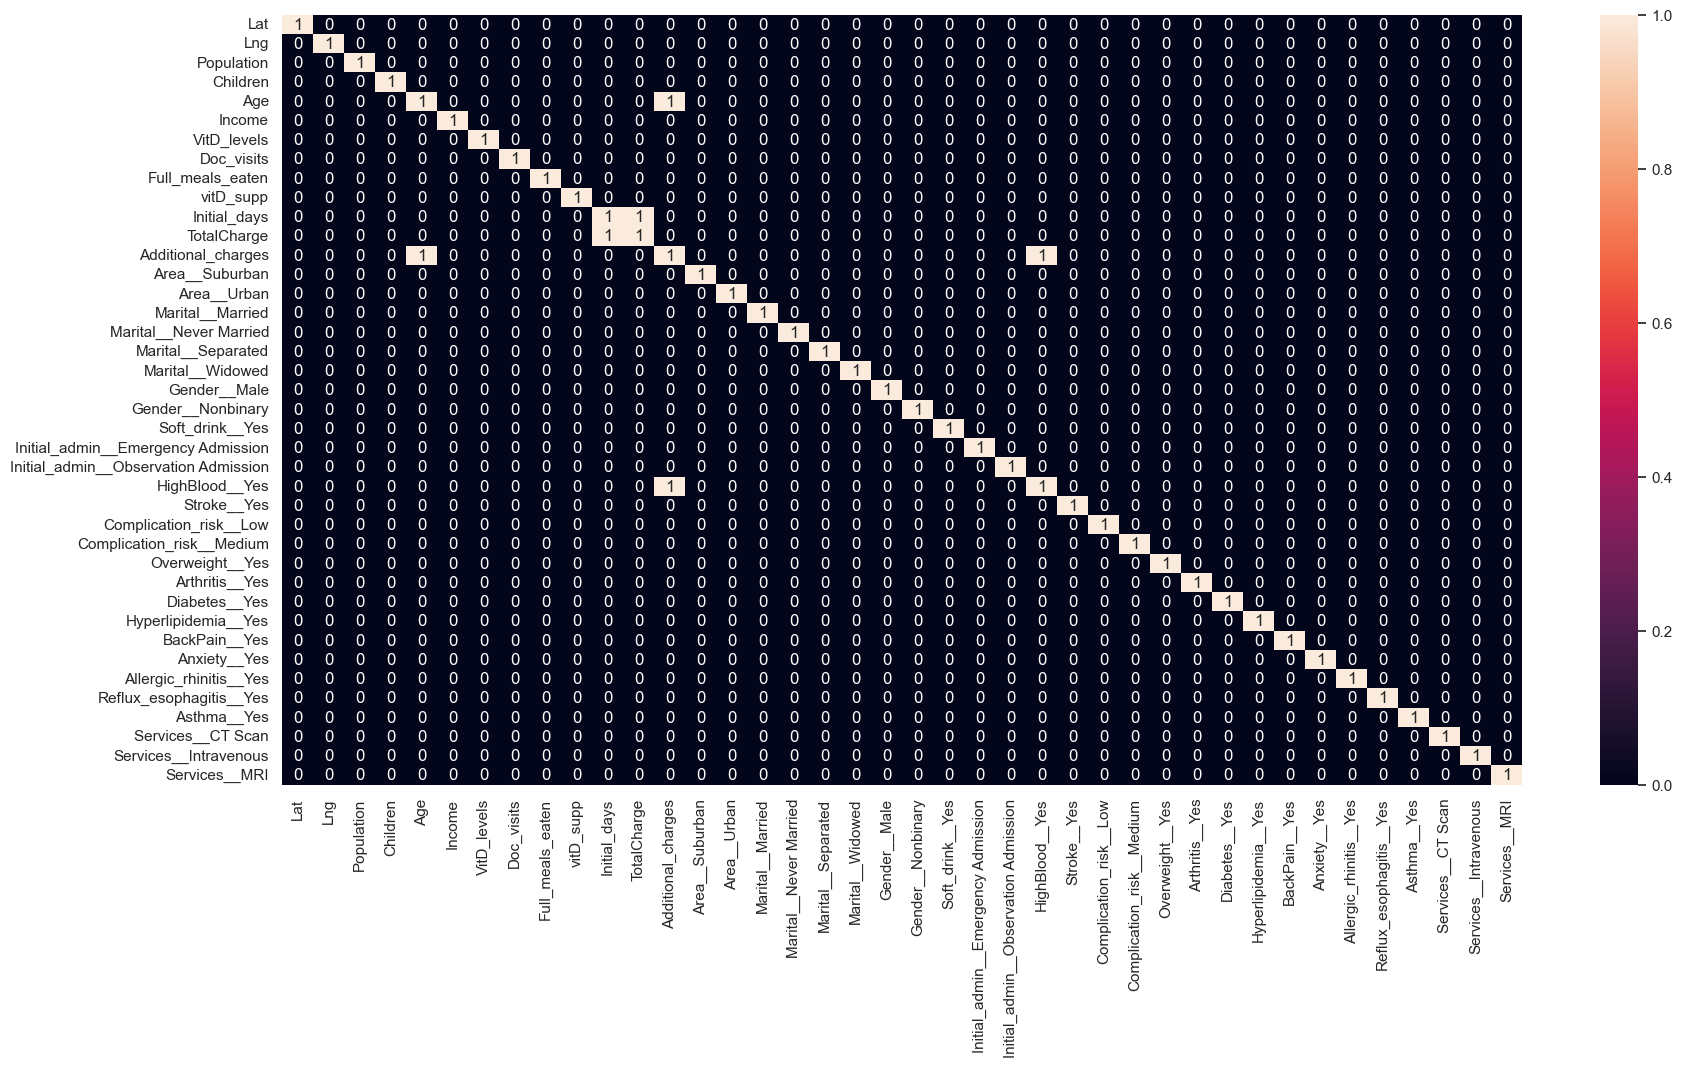

In [25]:
# Trying to make sense of numerical values, discover possible correlations
# Ref1: https://www.geeksforgeeks.org/how-to-create-a-seaborn-correlation-heatmap-in-python/
# Ref2: https://medium.com/@szabo.bibor/how-to-create-a-seaborn-correlation-heatmap-in-python-834c0686b88e
sns.set(rc = {'figure.figsize':(20,10)})
sns.heatmap(pca_df_binary.corr() > .5, annot=True);

### PCA Implementation:

In [26]:
pcs = PCA(n_components=3)
pcs.fit(pca_df_binary)
loadings = pd.DataFrame(pcs.components_, columns=pca_df_binary.columns)
loadings

,Lat,Lng,Population,Children,Age,Income,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,...,Diabetes__Yes,Hyperlipidemia__Yes,BackPain__Yes,Anxiety__Yes,Allergic_rhinitis__Yes,Reflux_esophagitis__Yes,Asthma__Yes,Services__CT Scan,Services__Intravenous,Services__MRI
0,-0.000004,-3.587261e-06,0.003865,5.440645e-07,-0.000009,0.999989,-9.275008e-07,4.944224e-07,-4.038341e-07,2.789781e-08,...,-1.585349e-07,1.434973e-07,1.716768e-07,-8.791170e-09,-2.391705e-08,2.854271e-07,9.372176e-08,-9.022682e-08,1.085814e-07,-1.665732e-08
1,-0.000076,-3.275443e-05,0.999985,3.507066e-07,-0.000027,-0.003868,3.726890e-07,8.841811e-07,-1.737526e-06,4.140808e-07,...,-2.977246e-07,-2.001532e-07,2.111729e-07,-4.611059e-07,2.531932e-07,4.731246e-07,-4.820788e-08,-1.548047e-07,-3.278339e-08,-1.475024e-07
2,-0.000003,-4.845344e-07,0.002573,4.538820e-06,0.002261,0.002384,2.517049e-06,1.321269e-06,2.841736e-06,1.004700e-06,...,1.586958e-07,-1.703362e-07,1.091828e-06,8.344441e-07,1.213957e-06,-8.320508e-07,9.760384e-07,6.540989e-07,-7.727223e-08,2.942486e-07


Text(0.5, 0, 'Component')

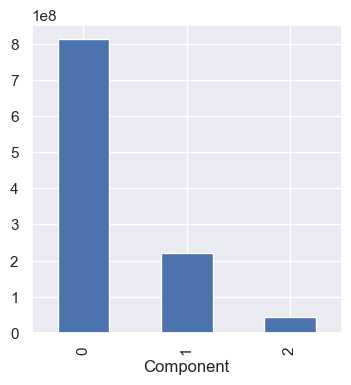

In [27]:
# Tested...3 seems best
explained_variance = pd.DataFrame(pcs.explained_variance_)
ax = explained_variance.head(10).plot.bar(legend=False, figsize=(4, 4))
ax.set_xlabel('Component')

In [28]:
pcs.components_.shape;

/Users/jasonewillis/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


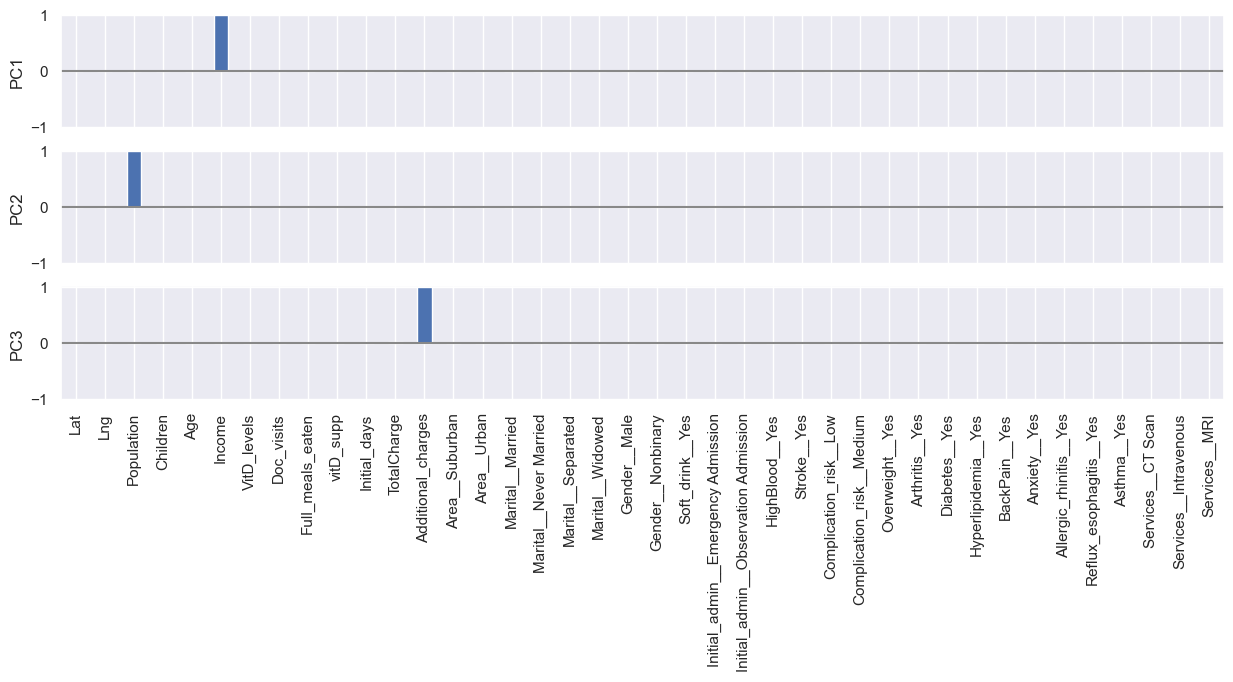

In [29]:
# ref: https://learning.oreilly.com/library/view/practical-statistics-for/9781492072935/ch07.html#idm45782023655048

pcs_c_n=pcs.components_.shape[0]
loadings = pd.DataFrame(pcs.components_[0:pcs_c_n, :], columns=pca_df_binary.columns)
maxPC = 1.01 * np.max(np.max(np.abs(loadings.loc[0:pcs_c_n, :])))

f, axes = plt.subplots(pcs_c_n, 1, figsize=(15, 5), sharex=True)
for i, ax in enumerate(axes):
    pc_loadings = loadings.loc[i, :]
    colors = ['C0' if l > 0 else 'C1' for l in pc_loadings]
    ax.axhline(color='#888888')
    pc_loadings.plot.bar(ax=ax, color=colors)
    ax.set_ylabel(f'PC{i+1}')
    ax.set_ylim(-maxPC, maxPC);

### K-Means Clustering

In [30]:
# http://mlreference.com/k-means-standardization-sklearn
# Preprocessing - Standardize Data

# Create the scalar.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(pca_df_binary)

# Standardize the columns.
pca_df_binary_standardized = pca_df_binary.copy()
standardized_data = scaler.transform(pca_df_binary)
pca_df_binary_standardized[pca_df_binary_standardized.columns] = standardized_data
pca_df_binary_standardized.head()

,Lat,Lng,Population,Children,Age,Income,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,...,Diabetes__Yes,Hyperlipidemia__Yes,BackPain__Yes,Anxiety__Yes,Allergic_rhinitis__Yes,Reflux_esophagitis__Yes,Asthma__Yes,Services__CT Scan,Services__Intravenous,Services__MRI
0,-0.814668,0.297134,-0.473168,-0.507129,-0.024795,1.615914,0.583603,0.944647,-0.993387,-0.634713,...,1.628589,-0.713268,1.196129,1.452728,1.239930,-0.839661,1.567361,-0.373632,-0.674985,-0.198749
1,-1.463305,0.395522,0.090242,0.417277,-0.121706,0.221443,0.483901,-0.967981,0.990609,0.956445,...,-0.614029,-0.713268,-0.836030,-0.688360,-0.806497,1.190957,-0.638015,-0.373632,1.481516,-0.198749
2,0.886966,-0.354788,0.482983,0.417277,-0.024795,-0.915870,0.046227,-0.967981,-0.001389,-0.634713,...,1.628589,-0.713268,-0.836030,-0.688360,-0.806497,-0.839661,-0.638015,-0.373632,-0.674985,-0.198749
3,0.952530,-0.149403,-0.526393,-0.969332,1.186592,-0.026263,-0.687811,-0.967981,-0.001389,-0.634713,...,-0.614029,-0.713268,-0.836030,-0.688360,-0.806497,1.190957,1.567361,-0.373632,-0.674985,-0.198749
4,-0.213252,0.943984,-0.315586,-0.507129,-1.526914,-1.377325,-0.260366,-0.011667,-0.993387,2.547602,...,-0.614029,1.401998,-0.836030,-0.688360,1.239930,-0.839661,-0.638015,2.676428,-0.674985,-0.198749


## Set n_clusters

In [31]:
# Clusters --> ReAdmin vs Not ReAdmitted 
kmeans = KMeans(n_clusters=2, init='k-means++', random_state=73).fit(pca_df_binary_standardized)

/Users/jasonewillis/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [32]:
pca_df_binary_standardized['cluster'] = kmeans.labels_
pca_df_binary_standardized.head()

,Lat,Lng,Population,Children,Age,Income,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,...,Hyperlipidemia__Yes,BackPain__Yes,Anxiety__Yes,Allergic_rhinitis__Yes,Reflux_esophagitis__Yes,Asthma__Yes,Services__CT Scan,Services__Intravenous,Services__MRI,cluster
0,-0.814668,0.297134,-0.473168,-0.507129,-0.024795,1.615914,0.583603,0.944647,-0.993387,-0.634713,...,-0.713268,1.196129,1.452728,1.239930,-0.839661,1.567361,-0.373632,-0.674985,-0.198749,1
1,-1.463305,0.395522,0.090242,0.417277,-0.121706,0.221443,0.483901,-0.967981,0.990609,0.956445,...,-0.713268,-0.836030,-0.688360,-0.806497,1.190957,-0.638015,-0.373632,1.481516,-0.198749,1
2,0.886966,-0.354788,0.482983,0.417277,-0.024795,-0.915870,0.046227,-0.967981,-0.001389,-0.634713,...,-0.713268,-0.836030,-0.688360,-0.806497,-0.839661,-0.638015,-0.373632,-0.674985,-0.198749,1
3,0.952530,-0.149403,-0.526393,-0.969332,1.186592,-0.026263,-0.687811,-0.967981,-0.001389,-0.634713,...,-0.713268,-0.836030,-0.688360,-0.806497,1.190957,1.567361,-0.373632,-0.674985,-0.198749,1
4,-0.213252,0.943984,-0.315586,-0.507129,-1.526914,-1.377325,-0.260366,-0.011667,-0.993387,2.547602,...,1.401998,-0.836030,-0.688360,1.239930,-0.839661,-0.638015,2.676428,-0.674985,-0.198749,1


In [33]:
pca_df_binary_standardized.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 41 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Lat                                   10000 non-null  float64
 1   Lng                                   10000 non-null  float64
 2   Population                            10000 non-null  float64
 3   Children                              10000 non-null  float64
 4   Age                                   10000 non-null  float64
 5   Income                                10000 non-null  float64
 6   VitD_levels                           10000 non-null  float64
 7   Doc_visits                            10000 non-null  float64
 8   Full_meals_eaten                      10000 non-null  float64
 9   vitD_supp                             10000 non-null  float64
 10  Initial_days                          10000 non-null  float64
 11  TotalCharge     

In [34]:
# Identify cluster
df_cluster = pca_df_binary_standardized.copy()

df_cluster['cluster'] = kmeans.labels_
df_cluster.head()

,Lat,Lng,Population,Children,Age,Income,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,...,Hyperlipidemia__Yes,BackPain__Yes,Anxiety__Yes,Allergic_rhinitis__Yes,Reflux_esophagitis__Yes,Asthma__Yes,Services__CT Scan,Services__Intravenous,Services__MRI,cluster
0,-0.814668,0.297134,-0.473168,-0.507129,-0.024795,1.615914,0.583603,0.944647,-0.993387,-0.634713,...,-0.713268,1.196129,1.452728,1.239930,-0.839661,1.567361,-0.373632,-0.674985,-0.198749,1
1,-1.463305,0.395522,0.090242,0.417277,-0.121706,0.221443,0.483901,-0.967981,0.990609,0.956445,...,-0.713268,-0.836030,-0.688360,-0.806497,1.190957,-0.638015,-0.373632,1.481516,-0.198749,1
2,0.886966,-0.354788,0.482983,0.417277,-0.024795,-0.915870,0.046227,-0.967981,-0.001389,-0.634713,...,-0.713268,-0.836030,-0.688360,-0.806497,-0.839661,-0.638015,-0.373632,-0.674985,-0.198749,1
3,0.952530,-0.149403,-0.526393,-0.969332,1.186592,-0.026263,-0.687811,-0.967981,-0.001389,-0.634713,...,-0.713268,-0.836030,-0.688360,-0.806497,1.190957,1.567361,-0.373632,-0.674985,-0.198749,1
4,-0.213252,0.943984,-0.315586,-0.507129,-1.526914,-1.377325,-0.260366,-0.011667,-0.993387,2.547602,...,1.401998,-0.836030,-0.688360,1.239930,-0.839661,-0.638015,2.676428,-0.674985,-0.198749,1


In [35]:
# Distinct Patient Clusters
from collections import Counter
Counter(kmeans.labels_)

Counter({1: 5003, 0: 4997})

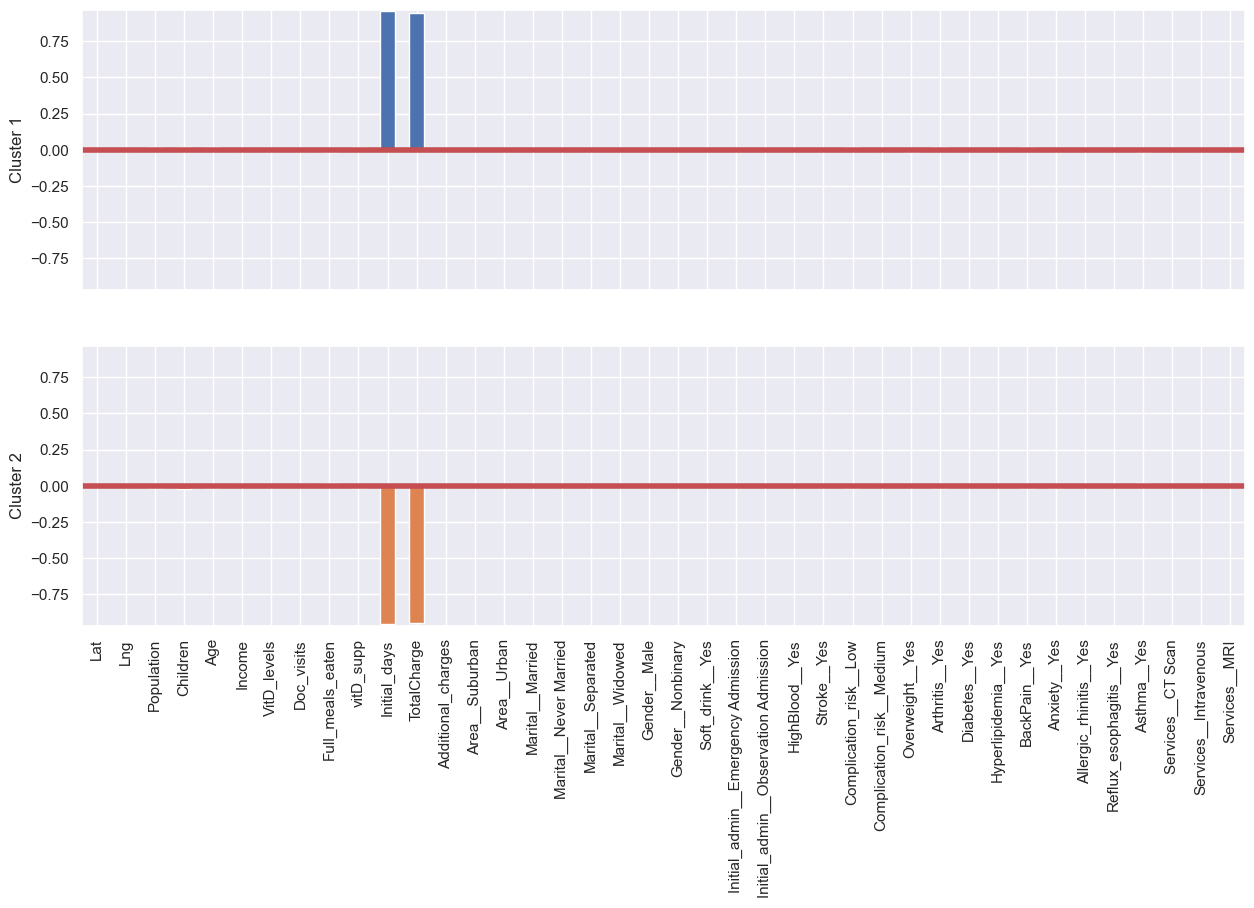

In [36]:
centers = pd.DataFrame(kmeans.cluster_centers_, columns=df_cluster.columns[:-1])
centers_n = kmeans.cluster_centers_.shape[0]


f, axes = plt.subplots(centers_n,1, figsize=(15,8), sharex=True)
for i, ax in enumerate(axes):
    center = centers.loc[i, :]
    maxPC = 1.01 * np.max(np.max(np.abs(center)))
    colors = ['C0' if l > 0 else 'C1' for l in center]
    ax.axhline(linewidth=4, color='r')
    center.plot.bar(ax=ax, color=colors)
    ax.set_ylabel(f'Cluster {i + 1}')
    ax.set_ylim(-maxPC, maxPC)

In [37]:
centers = pd.DataFrame(kmeans.cluster_centers_, columns=['Lat', 'Lng', 'Population', 'Children', 'Age', 'Income', 'VitD_levels',
       'Doc_visits', 'Full_meals_eaten', 'vitD_supp', 'Initial_days',
       'TotalCharge', 'Additional_charges', 'Area__Suburban', 'Area__Urban',
       'Marital__Married', 'Marital__Never Married', 'Marital__Separated',
       'Marital__Widowed', 'Gender__Male', 'Gender__Nonbinary',
       'Soft_drink__Yes', 'Initial_admin__Emergency Admission',
       'Initial_admin__Observation Admission', 'HighBlood__Yes', 'Stroke__Yes',
       'Complication_risk__Low', 'Complication_risk__Medium',
       'Overweight__Yes', 'Arthritis__Yes', 'Diabetes__Yes',
       'Hyperlipidemia__Yes', 'BackPain__Yes', 'Anxiety__Yes',
       'Allergic_rhinitis__Yes', 'Reflux_esophagitis__Yes', 'Asthma__Yes',
       'Services__CT Scan', 'Services__Intravenous', 'Services__MRI'])
centers

,Lat,Lng,Population,Children,Age,Income,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,...,Diabetes__Yes,Hyperlipidemia__Yes,BackPain__Yes,Anxiety__Yes,Allergic_rhinitis__Yes,Reflux_esophagitis__Yes,Asthma__Yes,Services__CT Scan,Services__Intravenous,Services__MRI
0,-0.001084,-0.010930,0.015112,0.021684,0.015650,-0.008714,-0.007201,-0.010710,-0.017869,0.017866,...,-0.000406,-0.006627,0.016940,0.012765,0.004537,0.011443,-0.017808,0.006099,-0.012409,0.010628
1,0.001082,0.010912,-0.015088,-0.021650,-0.015625,0.008700,0.007189,0.010693,0.017841,-0.017837,...,0.000405,0.006616,-0.016913,-0.012745,-0.004530,-0.011425,0.017780,-0.006089,0.012389,-0.010611


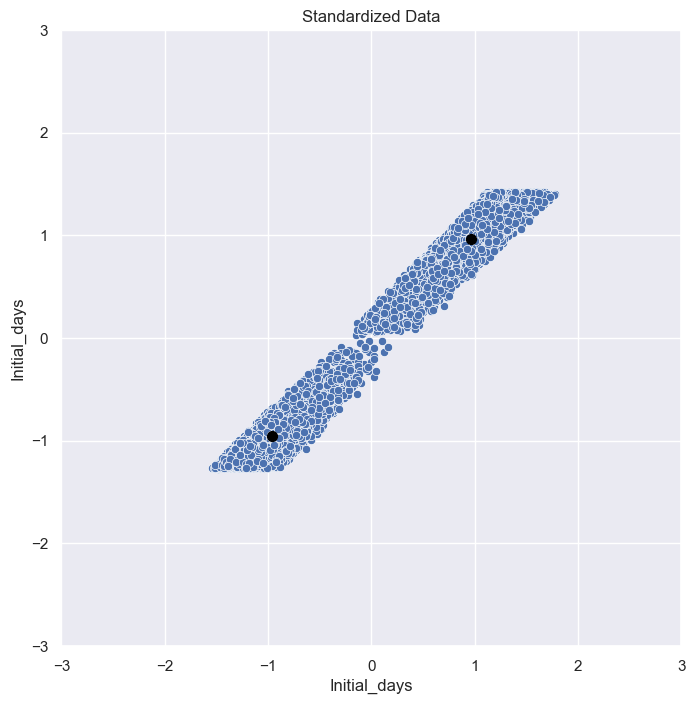

In [38]:
fig, ax = plt.subplots(figsize=(8, 8))
ax = sns.scatterplot(x='TotalCharge', y='Initial_days', ax=ax, data=pca_df_binary_standardized)
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)
centers.plot.scatter(x='Initial_days', y='Initial_days', ax=ax, s=50, color='black').set(title='Standardized Data');

/Users/jasonewillis/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/jasonewillis/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/jasonewillis/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/jasonewillis/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warni

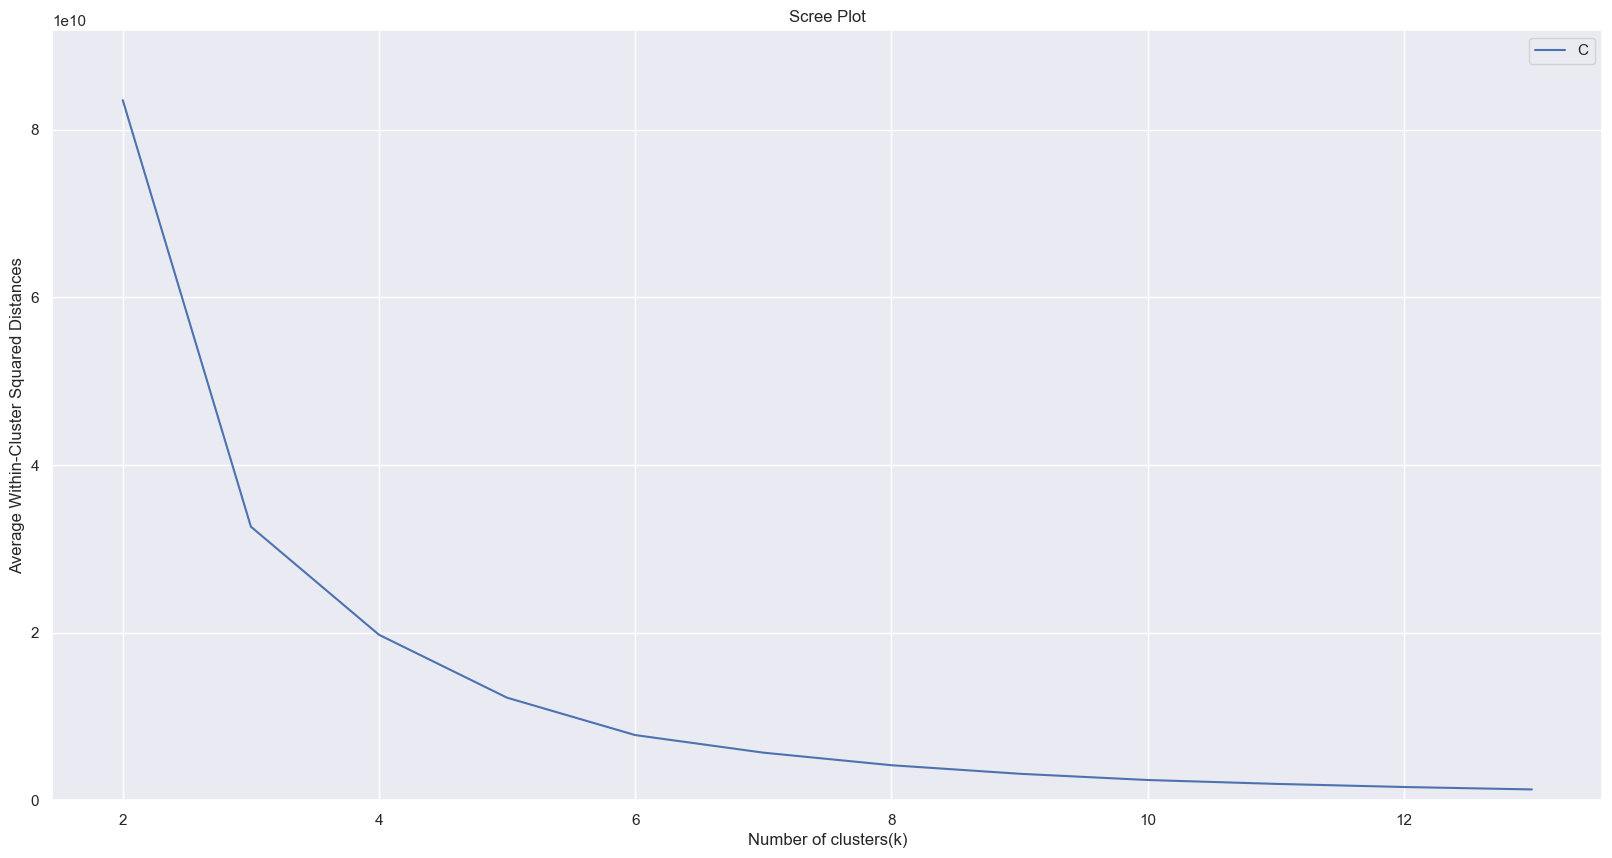

In [39]:
inertia = []
for n_clusters in range(2, 14):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(df_dummies)
    inertia.append(kmeans.inertia_ / n_clusters)

inertias = pd.DataFrame({'n_clusters': range(2, 14), 'inertia': inertia})
ax = inertias.plot(x='n_clusters', y='inertia')
plt.title('Scree Plot')
plt.xlabel('Number of clusters(k)')
plt.ylabel('Average Within-Cluster Squared Distances')
plt.ylim((0, 1.1 * inertias.inertia.max()))
ax.legend('Clusters').set_visible(True)

In [40]:
# create dataset
#X, y = pca_df_binary_standardized
# split into train test sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
#print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

In [41]:
# Adding Target Field to df
pca_df_binary_standardized_plus = pca_df_binary_standardized.copy()
pca_df_binary_standardized_plus['ReAdmis_Yes'] = df_dummies['ReAdmis_Yes'] 

In [42]:
pca_df_binary_standardized_plus.head()

,Lat,Lng,Population,Children,Age,Income,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,...,BackPain__Yes,Anxiety__Yes,Allergic_rhinitis__Yes,Reflux_esophagitis__Yes,Asthma__Yes,Services__CT Scan,Services__Intravenous,Services__MRI,cluster,ReAdmis_Yes
0,-0.814668,0.297134,-0.473168,-0.507129,-0.024795,1.615914,0.583603,0.944647,-0.993387,-0.634713,...,1.196129,1.452728,1.239930,-0.839661,1.567361,-0.373632,-0.674985,-0.198749,1,0
1,-1.463305,0.395522,0.090242,0.417277,-0.121706,0.221443,0.483901,-0.967981,0.990609,0.956445,...,-0.836030,-0.688360,-0.806497,1.190957,-0.638015,-0.373632,1.481516,-0.198749,1,0
2,0.886966,-0.354788,0.482983,0.417277,-0.024795,-0.915870,0.046227,-0.967981,-0.001389,-0.634713,...,-0.836030,-0.688360,-0.806497,-0.839661,-0.638015,-0.373632,-0.674985,-0.198749,1,0
3,0.952530,-0.149403,-0.526393,-0.969332,1.186592,-0.026263,-0.687811,-0.967981,-0.001389,-0.634713,...,-0.836030,-0.688360,-0.806497,1.190957,1.567361,-0.373632,-0.674985,-0.198749,1,0
4,-0.213252,0.943984,-0.315586,-0.507129,-1.526914,-1.377325,-0.260366,-0.011667,-0.993387,2.547602,...,-0.836030,-0.688360,1.239930,-0.839661,-0.638015,2.676428,-0.674985,-0.198749,1,0


### Save cleaned data to CSV

In [43]:
pca_df_binary_standardized_plus.to_csv('cleaned_pca_df_binary_standardized_plus.csv', index=False)

In [44]:
# Create training and testing data
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
# X = predictor, y = response
X_train, X_test, y_train, y_test = train_test_split(pca_df_binary_standardized, df_dummies['ReAdmis_Yes'], test_size=0.33, random_state=42)

In [45]:
print("PCA_Standardized Shape: " + str(pca_df_binary_standardized.shape))
print("X_Train Shape: " + str(X_train.shape))
print("y_Train Shape: " + str(y_train.shape))
print("X_Test Shape: " + str(X_test.shape))
print("y_Test Shape: " + str(y_test.shape))

PCA_Standardized Shape: (10000, 41)
X_Train Shape: (6700, 41)
y_Train Shape: (6700,)
X_Test Shape: (3300, 41)
y_Test Shape: (3300,)


In [46]:
print("***** Train_Set *****")
print(X_train.head())
print("\n")
print("***** Test_Set *****")
print(X_test.head())

***** Train_Set *****
           Lat       Lng  Population  Children       Age    Income  \
8371 -0.313238  0.627401   -0.426690 -0.969332  0.750493 -0.700692   
5027 -2.210094  0.609127    0.097190  0.417277  0.605126  0.187865   
9234 -0.518676  0.442590    0.465106 -0.969332 -1.478459  0.977979   
3944  0.792480  1.002280    0.174362 -0.507129 -0.896993  0.218487   
6862 -0.788833 -1.757797    0.348741  1.803886 -0.896993  0.177451   

      VitD_levels  Doc_visits  Full_meals_eaten  vitD_supp  ...  \
8371    -1.027936   -0.967981          0.990609  -0.634713  ...   
5027     0.135836   -0.967981          1.982607  -0.634713  ...   
9234    -0.157318   -0.967981         -0.001389   0.956445  ...   
3944    -0.380859   -0.011667         -0.993387   0.956445  ...   
6862     0.792105   -0.011667         -0.993387  -0.634713  ...   

      Hyperlipidemia__Yes  BackPain__Yes  Anxiety__Yes  \
8371            -0.713268       1.196129     -0.688360   
5027            -0.713268      -0.8360

### Describe Data Sets:

In [47]:
print("***** Train_Set *****")
print(y_train.describe())
print("\n")
print("***** Test_Set *****")
print(y_test.describe())

***** Train_Set *****
count    6700.000000
mean        0.370746
std         0.483041
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: ReAdmis_Yes, dtype: float64


***** Test_Set *****
count    3300.000000
mean        0.359091
std         0.479807
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: ReAdmis_Yes, dtype: float64


In [48]:
print(X_train.columns.values)

['Lat' 'Lng' 'Population' 'Children' 'Age' 'Income' 'VitD_levels'
 'Doc_visits' 'Full_meals_eaten' 'vitD_supp' 'Initial_days' 'TotalCharge'
 'Additional_charges' 'Area__Suburban' 'Area__Urban' 'Marital__Married'
 'Marital__Never Married' 'Marital__Separated' 'Marital__Widowed'
 'Gender__Male' 'Gender__Nonbinary' 'Soft_drink__Yes'
 'Initial_admin__Emergency Admission'
 'Initial_admin__Observation Admission' 'HighBlood__Yes' 'Stroke__Yes'
 'Complication_risk__Low' 'Complication_risk__Medium' 'Overweight__Yes'
 'Arthritis__Yes' 'Diabetes__Yes' 'Hyperlipidemia__Yes' 'BackPain__Yes'
 'Anxiety__Yes' 'Allergic_rhinitis__Yes' 'Reflux_esophagitis__Yes'
 'Asthma__Yes' 'Services__CT Scan' 'Services__Intravenous' 'Services__MRI'
 'cluster']


### Verify No Missing Values:

In [49]:
print("*****In the X_Train Set*****")
print(X_train.isna().sum())
print("\n")
print("*****In the X_Test Set*****")
print(X_test.isna().sum())

*****In the X_Train Set*****
Lat                                     0
Lng                                     0
Population                              0
Children                                0
Age                                     0
Income                                  0
VitD_levels                             0
Doc_visits                              0
Full_meals_eaten                        0
vitD_supp                               0
Initial_days                            0
TotalCharge                             0
Additional_charges                      0
Area__Suburban                          0
Area__Urban                             0
Marital__Married                        0
Marital__Never Married                  0
Marital__Separated                      0
Marital__Widowed                        0
Gender__Male                            0
Gender__Nonbinary                       0
Soft_drink__Yes                         0
Initial_admin__Emergency Admission      0
Initi

In [50]:
print("*****In the y_train Set*****")
print(y_train.isna().sum())
print("\n")
print("*****In the y_test Set*****")
print(y_test.isna().sum())
print('--------'*5)
print('y_train:')
print(y_train)

*****In the y_train Set*****
0


*****In the y_test Set*****
0
----------------------------------------
y_train:
8371    0
5027    1
9234    0
3944    0
6862    1
       ..
5734    0
5191    1
5390    1
860     0
7270    0
Name: ReAdmis_Yes, Length: 6700, dtype: uint8


In [51]:
train = X_train.copy()
# Concatinate ReAdmis_Yes Data Field
train['ReAdmis_Yes'] = y_train
train.head()

,Lat,Lng,Population,Children,Age,Income,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,...,BackPain__Yes,Anxiety__Yes,Allergic_rhinitis__Yes,Reflux_esophagitis__Yes,Asthma__Yes,Services__CT Scan,Services__Intravenous,Services__MRI,cluster,ReAdmis_Yes
8371,-0.313238,0.627401,-0.426690,-0.969332,0.750493,-0.700692,-1.027936,-0.967981,0.990609,-0.634713,...,1.196129,-0.688360,-0.806497,1.190957,1.567361,-0.373632,1.481516,-0.198749,0,0
5027,-2.210094,0.609127,0.097190,0.417277,0.605126,0.187865,0.135836,-0.967981,1.982607,-0.634713,...,-0.836030,-0.688360,1.239930,-0.839661,1.567361,2.676428,-0.674985,-0.198749,0,1
9234,-0.518676,0.442590,0.465106,-0.969332,-1.478459,0.977979,-0.157318,-0.967981,-0.001389,0.956445,...,-0.836030,1.452728,1.239930,-0.839661,1.567361,-0.373632,-0.674985,-0.198749,0,0
3944,0.792480,1.002280,0.174362,-0.507129,-0.896993,0.218487,-0.380859,-0.011667,-0.993387,0.956445,...,1.196129,-0.688360,-0.806497,-0.839661,-0.638015,-0.373632,-0.674985,-0.198749,1,0
6862,-0.788833,-1.757797,0.348741,1.803886,-0.896993,0.177451,0.792105,-0.011667,-0.993387,-0.634713,...,1.196129,-0.688360,-0.806497,1.190957,1.567361,-0.373632,-0.674985,-0.198749,0,1


In [52]:
# Average of the train set grouped by ReAdmis_Yes
# pca_df_target = df['ReAdmis_Yes']
# pca_df = df
train[['ReAdmis_Yes', 'Initial_days', 'TotalCharge']].groupby(['ReAdmis_Yes'], as_index=False).mean().sort_values(by='ReAdmis_Yes', ascending=False)

,ReAdmis_Yes,Initial_days,TotalCharge
1,1,1.115040,1.104961
0,0,-0.643809,-0.638415


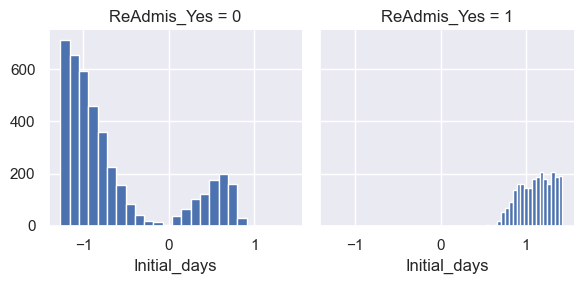

In [53]:
#train[['ReAdmis_Yes', 'Initial_days', 'TotalCharge']].groupby(['ReAdmis_Yes'], as_index=False).mean().sort_values(by='ReAdmis_Yes', ascending=False)

g = sns.FacetGrid(train, col='ReAdmis_Yes')
g.map(plt.hist, 'Initial_days', bins=20);

In [54]:
test = X_test.copy()
test['ReAdmis_Yes'] = y_test
test.head()

,Lat,Lng,Population,Children,Age,Income,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,...,BackPain__Yes,Anxiety__Yes,Allergic_rhinitis__Yes,Reflux_esophagitis__Yes,Asthma__Yes,Services__CT Scan,Services__Intravenous,Services__MRI,cluster,ReAdmis_Yes
6252,-0.873874,0.528136,-0.208530,-0.507129,0.653582,0.726271,0.089884,0.944647,-0.001389,0.956445,...,1.196129,-0.688360,-0.806497,1.190957,-0.638015,2.676428,-0.674985,-0.198749,0,0
4684,0.105079,-0.722315,-0.327391,-0.507129,0.217483,-0.226763,0.454914,-0.011667,-0.001389,-0.634713,...,1.196129,-0.688360,1.239930,1.190957,-0.638015,-0.373632,-0.674985,-0.198749,1,0
1731,0.066915,-0.359337,-0.554523,-0.507129,1.041226,-0.390756,1.976174,-0.011667,0.990609,-0.634713,...,-0.836030,-0.688360,1.239930,-0.839661,-0.638015,-0.373632,1.481516,-0.198749,1,0
4742,0.400256,1.196740,0.991684,-0.044926,1.089681,0.825839,-0.028400,-0.011667,-0.993387,0.956445,...,-0.836030,-0.688360,1.239930,-0.839661,-0.638015,-0.373632,-0.674985,-0.198749,1,0
4521,0.612512,1.263335,0.467400,-0.969332,-0.073250,-0.476741,1.062094,-0.011667,1.982607,-0.634713,...,1.196129,1.452728,1.239930,1.190957,-0.638015,-0.373632,-0.674985,-0.198749,1,0


In [55]:
test.shape

(3300, 42)

In [56]:
test[['ReAdmis_Yes', 'Initial_days', 'TotalCharge']].groupby(['ReAdmis_Yes'], as_index=False).mean().sort_values(by='ReAdmis_Yes', ascending=False)

,ReAdmis_Yes,Initial_days,TotalCharge
1,1,1.123243,1.11535
0,0,-0.655559,-0.65005


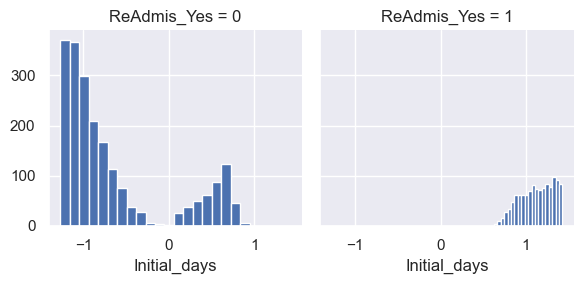

In [57]:
g = sns.FacetGrid(test, col='ReAdmis_Yes')
g.map(plt.hist, 'Initial_days', bins=20);

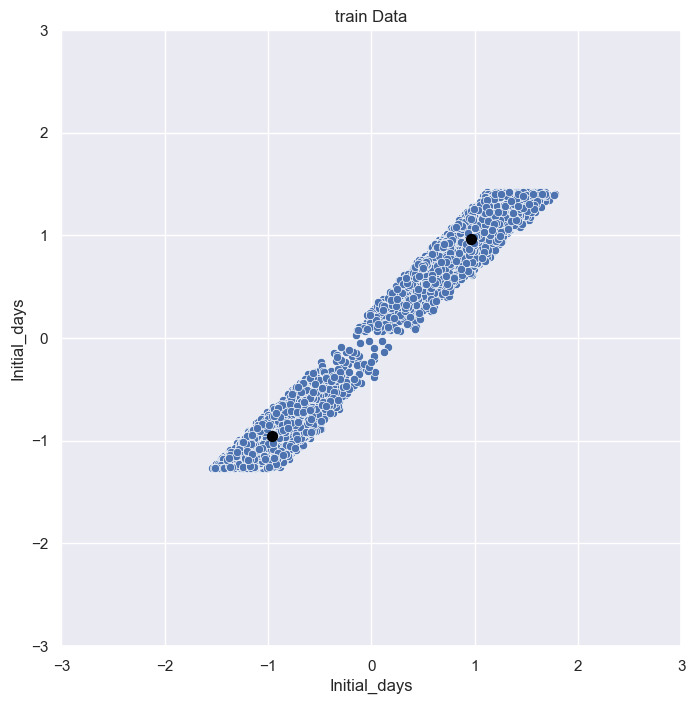

In [58]:
fig, ax = plt.subplots(figsize=(8, 8))
ax = sns.scatterplot(x='TotalCharge', y='Initial_days', ax=ax, data=train)
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)
centers.plot.scatter(x='Initial_days', y='Initial_days', \
                     ax=ax, s=50, color='black').set(title='train Data');

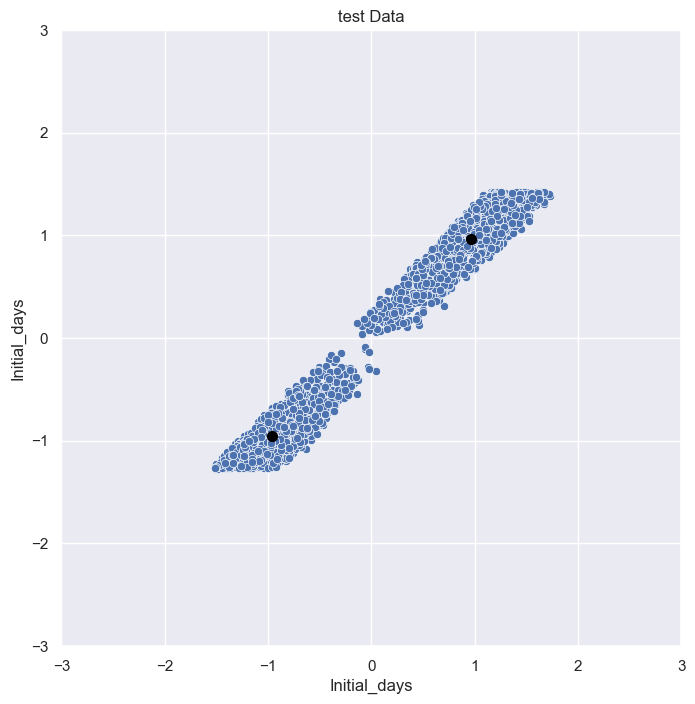

In [59]:
fig, ax = plt.subplots(figsize=(8, 8))
ax = sns.scatterplot(x='TotalCharge', y='Initial_days', ax=ax, data=test)
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)
centers.plot.scatter(x='Initial_days', y='Initial_days', \
                     ax=ax, s=50, color='black').set(title='test Data');

## Export Data

In [60]:
pca_df_binary_standardized_plus.to_csv('cleaned_pca_df_binary_standardized_plus.csv', index=False)
X_train.to_csv('X_train_data.csv', index=False)
X_test.to_csv('X_test_data.csv', index=False)
y_train.to_csv('y_train_data.csv', index=False)
y_test.to_csv('y_test_data.csv', index=False)